# Creating Customer Segments

### Unsupervised Learning

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

**Description of Categories**
- FRESH: annual spending (m.u.) on fresh products (Continuous)
- MILK: annual spending (m.u.) on milk products (Continuous)
- GROCERY: annual spending (m.u.) on grocery products (Continuous)
- FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)
    - "A store selling cold cuts, cheeses, and a variety of salads, as well as a selection of unusual or foreign prepared foods."


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import renders as rs
%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [2]:
# Write code here
data = pd.read_csv('customers.csv')
df = data.copy()

**Task 2: Drop Region and Channel column**

In [3]:
# Write code here
df.drop(['Region', 'Channel'], axis = 1, inplace = True)

**Task 3: Display first five rows** 

In [4]:
# Write code here
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### **Task 4: Display last five rows** 

In [5]:
# Write code here
df.tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


#### **Task 5: Check the number of rows and columns**

In [6]:
# Write code here
print('Rows:   ', df.shape[0])
print('Columns:', df.shape[1])

Rows:    440
Columns: 6


#### **Task 6: Check data types of all columns**

In [7]:
# Write code here
df.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

**Task 7: Check for missing values and fill missing values if required.**

In [8]:
# Write code here
df.isnull()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
435,False,False,False,False,False,False
436,False,False,False,False,False,False
437,False,False,False,False,False,False
438,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

## Data Exploration

#### **Task 8: Check summary statistics and store the resultant DataFrame in a new variable named *stats***

In [10]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
# Write code here
stats = df
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


**Question: Explain the summary statistics for the above data set**

**Answer:** The dataset is composed of six important product categories: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'. Each category represents in terms of products one could purchase.

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

**Logic in selecting the 3 samples: Quartiles**
- As you can previously (in the object "stats"), we've the data showing the first and third quartiles.
- We can filter samples that are starkly different based on the quartiles.
    - This way we've two establishments that belong in the first and third quartiles respectively in, for example, the Frozen category.

**Task 9: Select any random sample and assign the list to given variable**

In [12]:
# Write code here
indices = [61, 244, 315]

These samples will be separated into another dataframe for finding out the details the type of customer each of the selected respresents

**Task 10: Make a dataframe of selected indices**

In [13]:
# Write code here
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

In [14]:
# Write code here
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,35942,38369,59598,3254,26701,2017
1,1,1,6202,7775,10817,1183,3143,1970
2,2,2,1479,14982,11924,662,3891,3508


The selected sample values should be ranked amongst the whole of the data values to check their ranks and get a better understanding of spending of each sample/customer in each category

In [15]:
percentiles = df.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
percentiles

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
61,94.5,99.1,99.5,73.2,99.5,78.6
244,40.5,78.4,75.9,42.7,70.0,78.2
315,13.4,93.4,79.5,23.6,74.8,93.2


**Task 11: Draw a heatmap to show the above results achieved in** `percentile` **to have a better understanding.**

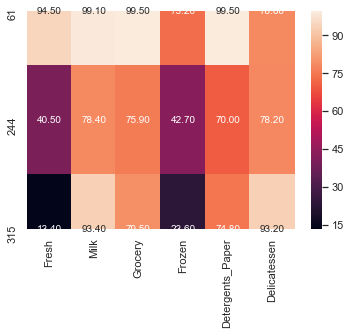

In [16]:
#Write code here
sns.heatmap(percentiles, annot=True, fmt='.2f')

#### Question: What type of customers can you identify by looking into the heatmap?

#### Answer:  
The mean values are :
- Fresh: 12000.2977
- Milk: 5796.2
- Grocery: 7951.3
- Frozen: 3071.9
- Detergents_paper: 2881.4
- Delicatessen: 1524.8

We can use the mean values given above and the percentiles heatmap to have an insight of the kind of establishments each sample might be.

- First example: the costs are very high for every feature, this could indicate a wholesale store.

- Second example: we can see that the purchase cost for Milk, Grocery and Delicatessen products are high, above the mean values.

- Last example: the Milk, Grocery and Delicatessen values are very high, even more than the second example.

**Task 12: Find the corelation among all the variables of whole dataframe and describe the findings you infer from the heatmapt.**

In [17]:
# Write the code here
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


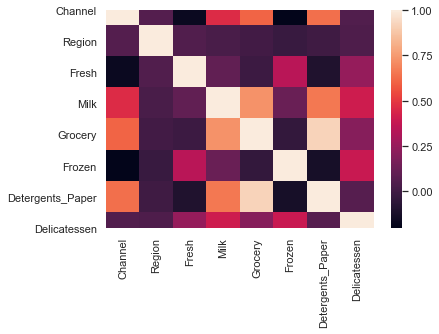

In [18]:
sns.heatmap(data.corr())

### Pair Plot

Pairplot is a plot which is used to give and over view of the data in a graphical grid form. The result it shows gives us a picture of variables themselves in a graphical way as well as a relationship of one variable with all the others. For more details you can [click here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**Task 13: Make a pairplot using seaborn.**

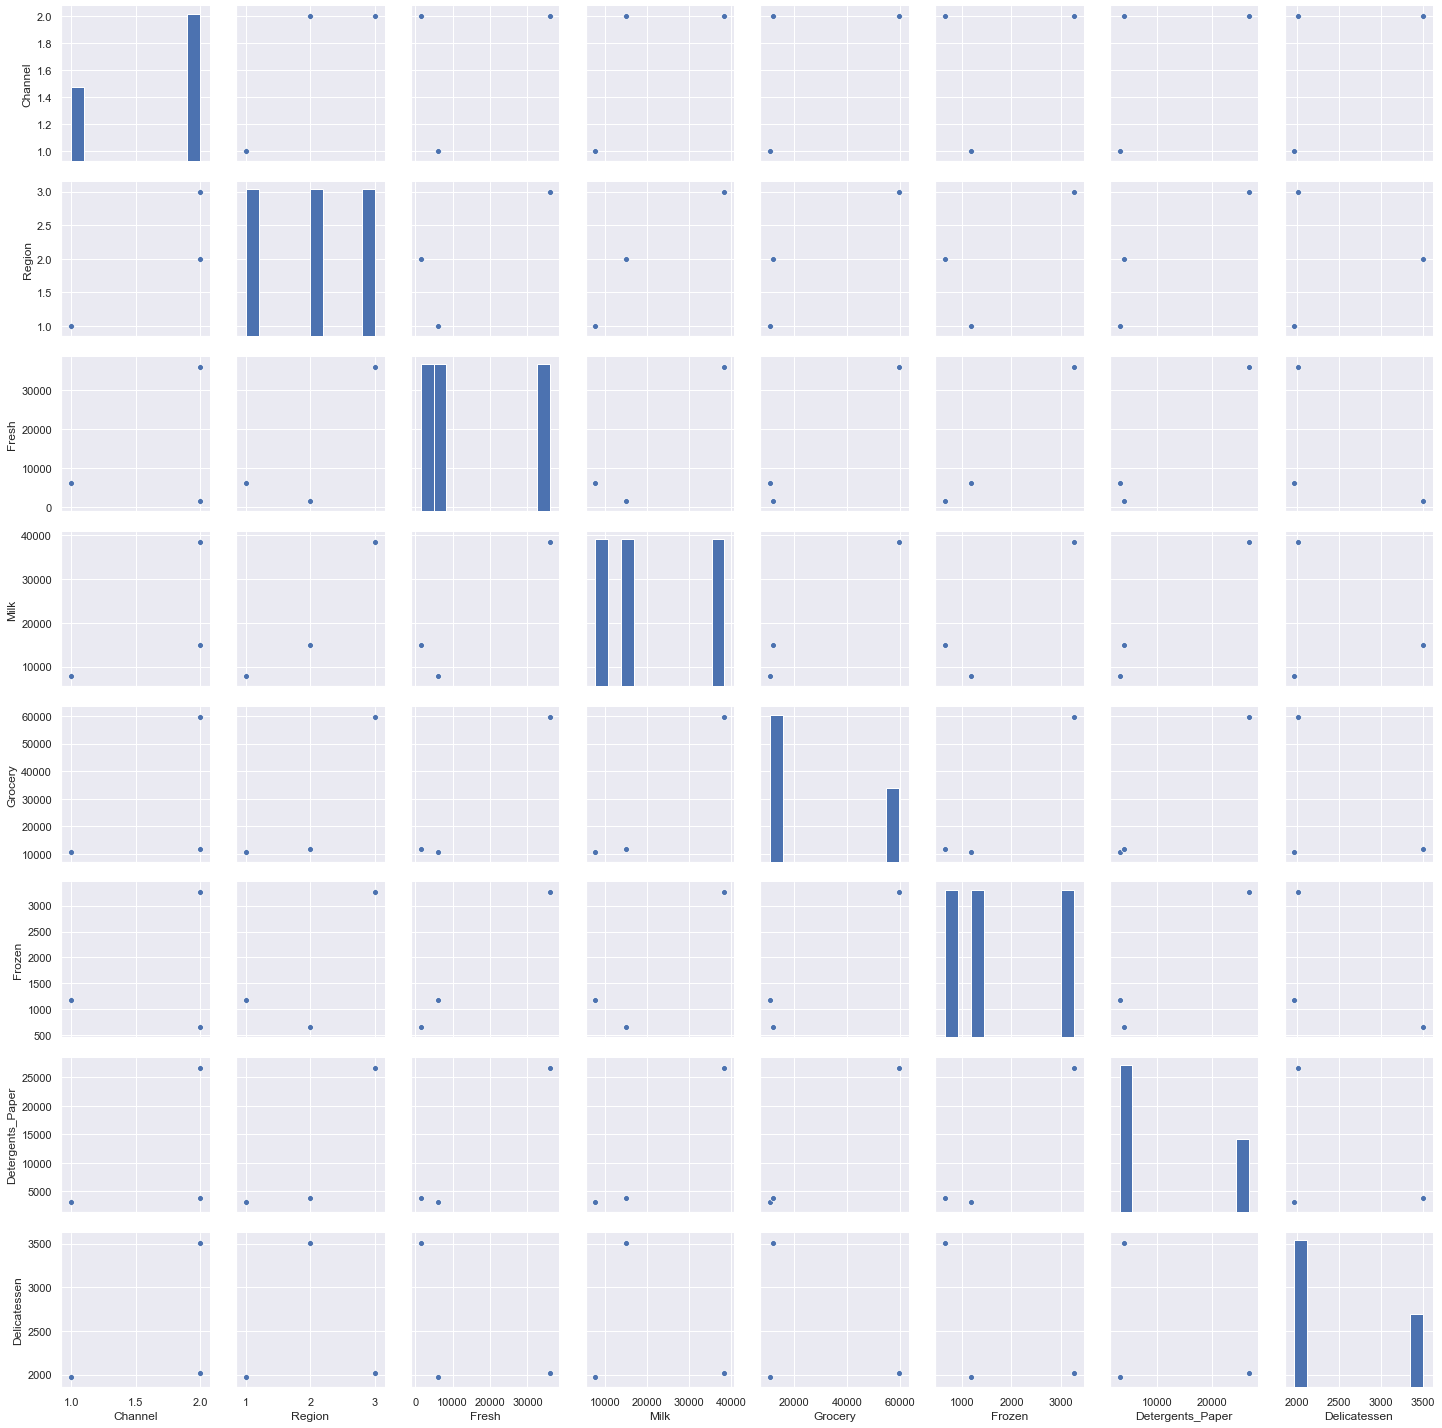

In [19]:
# write code here
sns.pairplot(samples)

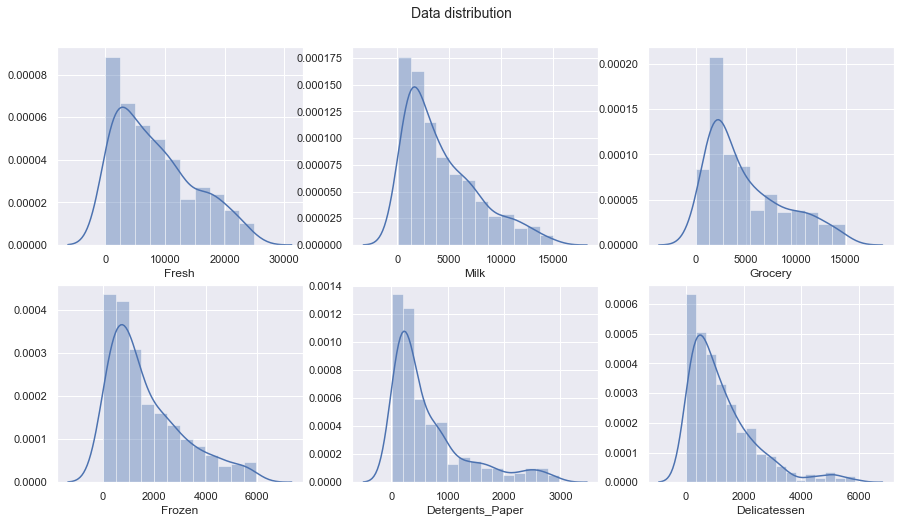

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(231)
sns.distplot(data.Fresh[data["Fresh"]<=25000])
plt.subplot(232)
sns.distplot(data.Milk[data["Milk"]<=15000])
plt.subplot(233)
sns.distplot(data.Grocery[data["Grocery"]<=15000])
plt.subplot(234)
sns.distplot(data.Frozen[data["Frozen"]<=6000])
plt.subplot(235)
sns.distplot(data.Detergents_Paper[data["Detergents_Paper"]<=3000])
plt.subplot(236)
sns.distplot(data.Delicatessen[data["Delicatessen"]<=6000])
plt.suptitle("Data distribution", fontsize = 14, y = 0.95)
plt.show()

**Question: What findings do you get from the above plot? Describe in terms of skewned/normal form by looking at each variable and also look for any outliers that can be visually identified in the plot.**

**Answer:** The distributions are highly right-skewed,

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by normalizing it by **removing skewness** and **detecting (and optionally removing) outliers**. 

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data.

**Task 14: Apply log on data for transforming it from skewed to normalized form. Use function** `np.log()` **and save the result in** `log_data`

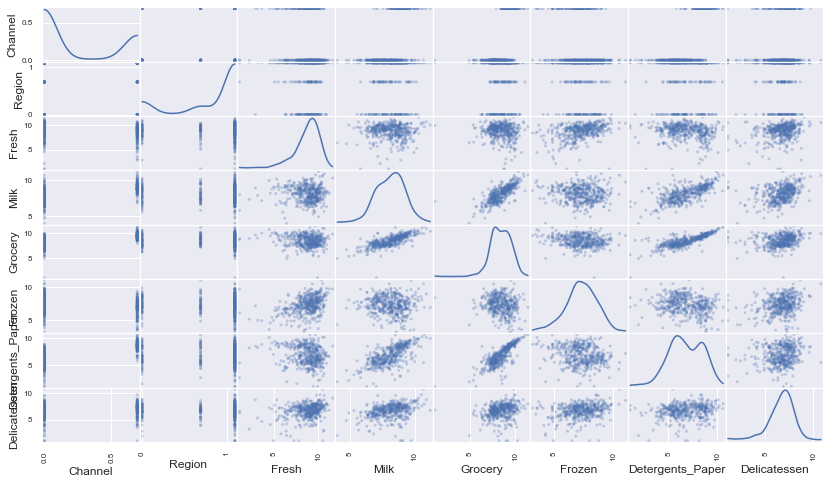

In [21]:
#Write code here

log_data = data.apply(lambda x: np.log(x))

log_samples = samples.apply(lambda x: np.log(x))

pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to Q1. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to Q3. Again, use `np.percentile`.
 - Assign the calculation of an IQR for the given feature.
 - Query the data to filter out Outliers using IQR
 - remove data points from the dataset by adding indices to the outliers list

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points! 

Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [22]:
outliers=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(a=log_data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    out=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers=outliers+list(out.index.values)
    
# Select the indices for data points you wish to remove
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    
print ("Outliers: {}".format(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Channel':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Region':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
196,0.000000,0.0,10.329539,8.883086,8.496378,9.836867,6.637258,7.964156
197,0.693147,0.0,7.794411,8.867427,9.248695,7.027315,8.369621,7.291656
198,0.000000,0.0,9.366147,7.675082,8.828201,8.168203,6.383507,6.546785
199,0.000000,0.0,9.176784,7.731931,7.655391,6.253829,5.996452,5.849325
200,0.693147,0.0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
...,...,...,...,...,...,...,...,...
268,0.693147,0.0,9.384966,8.993800,9.895808,6.974479,8.759982,6.548219
269,0.000000,0.0,9.630234,5.552960,7.037028,7.830426,5.808142,5.318120
270,0.000000,0.0,8.459564,6.939254,6.882437,8.612503,5.283204,4.025352
271,0.000000,0.0,7.641564,8.518592,7.354362,7.021084,4.990433,7.346010


Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,0.693147,1.098612,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,0.000000,1.098612,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,0.693147,1.098612,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,0.693147,1.098612,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,0.693147,1.098612,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,0.693147,0.000000,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,0.693147,0.693147,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,0.693147,1.098612,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,0.000000,1.098612,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,0.000000,1.098612,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,0.693147,1.098612,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,0.693147,1.098612,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,0.693147,1.098612,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,0.693147,1.098612,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,0.693147,0.000000,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,0.000000,0.693147,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,0.000000,1.098612,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,0.000000,1.098612,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,0.000000,1.098612,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,0.0,1.098612,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,0.693147,1.098612,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,0.000000,1.098612,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,0.000000,1.098612,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,0.000000,1.098612,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,0.000000,1.098612,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,0.000000,1.098612,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,0.000000,0.000000,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers: [128, 65, 66, 154, 264, 233, 203, 75, 218]


**Question**<br>
Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why?

**Answer:**  
- Yes, there are outliers for more than one feature.
- Yes, they should be removed.
- Outliers within the dataset can change the results of next steps in clustering analysis. It is a good strategy to remove them.

**Task 15: Make a pairplot to check changes in data after pre-processing and using the** `good_data`

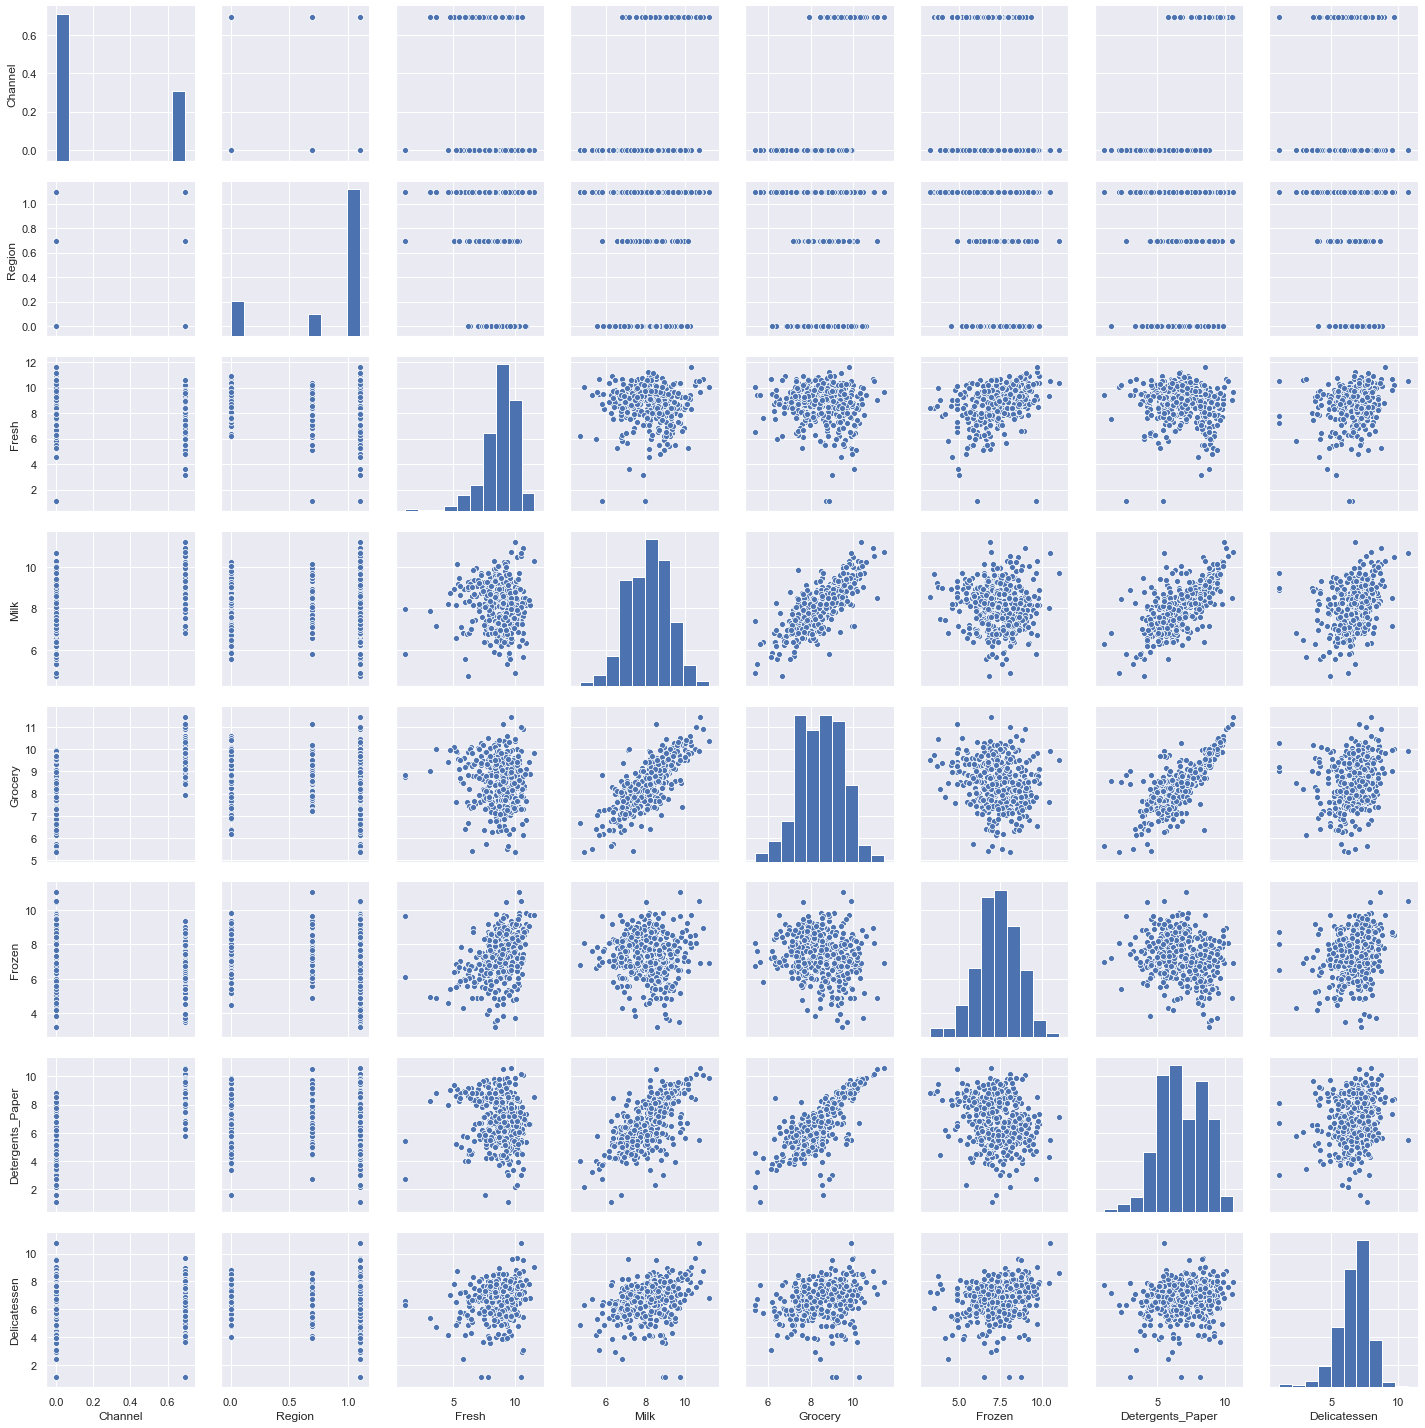

In [23]:
# Write the code here
sns.pairplot(good_data)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and 
 - Apply a PCA transformation of the good data.

**Task 16: Import PCA Library**

**Task 17: Apply PCA by fitting the good data with the same number of dimensions as features.**

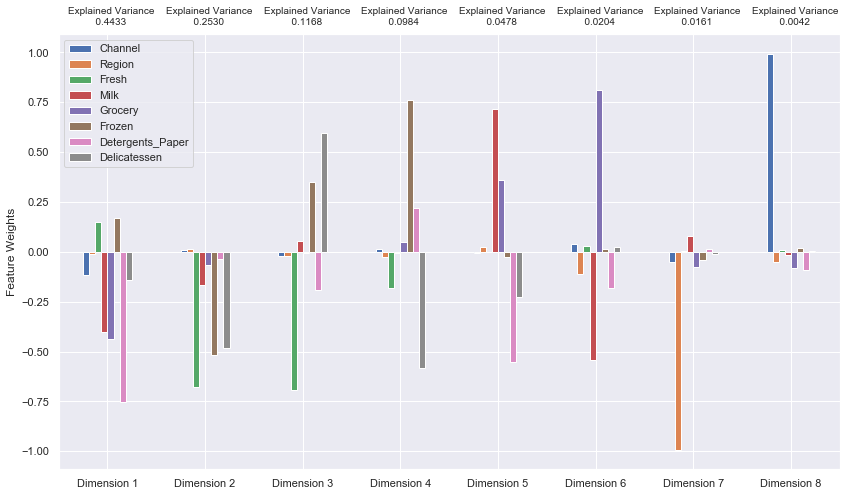

In [25]:
from sklearn.decomposition import PCA
import visuals as vs
from sklearn.decomposition import PCA


pca = PCA().fit(good_data)


pca_samples = pca.transform(log_samples)


pca_results = vs.pca_results(good_data, pca)

**Task 18: Find cumulative explained variance**

In [26]:
# Write the code here
pca.explained_variance_ratio_[:2].sum()

0.6962667942226775

In [27]:
pca.explained_variance_ratio_[:4].sum()

0.9114806381112429

**Question**
How much variance in the data is explained ***in total*** by the first and second principal component? What about the first four principal components? How many components should be selected for reducing the dimensions? Give your answer along with the reason.

**Answer:** 
<br> variance in the data explained in total by the first and second principal component:
- 70 %
<br> variance in the data is explained by the first four principal components:
- 91.14 %
<br> components selected for reducing the dimensions: 4 dimensions
- Dimension 1
<br> PCA has the following three major features: Detergents_Paper, Grocery and Milk. This confirms what we found out on previous analysis, because the pairs of features with high correlation are Grocery/Milk, Detergents_Paper/Milk, Detergents_Paper/Grocery.
- Dimension 2
<br> The major features within this dimension are Fresh, Frozen and Delicatessen. We didn't see the correlations between these features because their impact on the data distribution is much smaller, as the variance explained by this dimension is 0.2638.
- Dimension 3
<br> The major features are Fresh and Delicatessen. So, this dimension can also help separating specific types of restaurants and markets.
- Dimension 4
<br> The major features are Frozen and Delicatessen. So, this dimension can also help separating specific types of restaurants and markets.

### Implementation: Dimensionality Reduction
In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

**Task 19: Apply PCA by fitting the good data with the selected number of components**

In [28]:
# write your code here
pca = PCA(n_components=2).fit(good_data)

**Task 20: Transform the good data using the PCA fit above**

In [29]:
# write your code here
reduced_data = reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_samples)

**Task 21: Create a DataFrame for the reduced data**

In [30]:
# write your code here
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [31]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-4.4324,-2.6733
1,-1.7873,-0.5032
2,-2.7357,0.3850


## Implementation: Creating Clusters

In this section, you will choose to use either a K-Means clustering algorithm  and hierarchical clustering to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

## Choosing K

**Before Implementing KMeans and hierarchical clustering, choose the optimal K using the following method**

- Silhouette Score

### Silhouette Score for K-Means

In [32]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Task 22: Check Silhouette Score for finding Optimal K**

In [35]:
# write your code here
s_score = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(reduced_data)
    s_score.append([k, silhouette_score(reduced_data, kmeans.labels_)])

In [36]:
s_score

[[2, 0.4332792700337814],
 [3, 0.3907968146488368],
 [4, 0.3339118711437276],
 [5, 0.3506674969120066],
 [6, 0.3529676847111385],
 [7, 0.3613543213281282],
 [8, 0.35049036073400797],
 [9, 0.3506726227406371],
 [10, 0.37226155224698104]]

**Task 23: Plot a graph representing the Silhouette Score.**

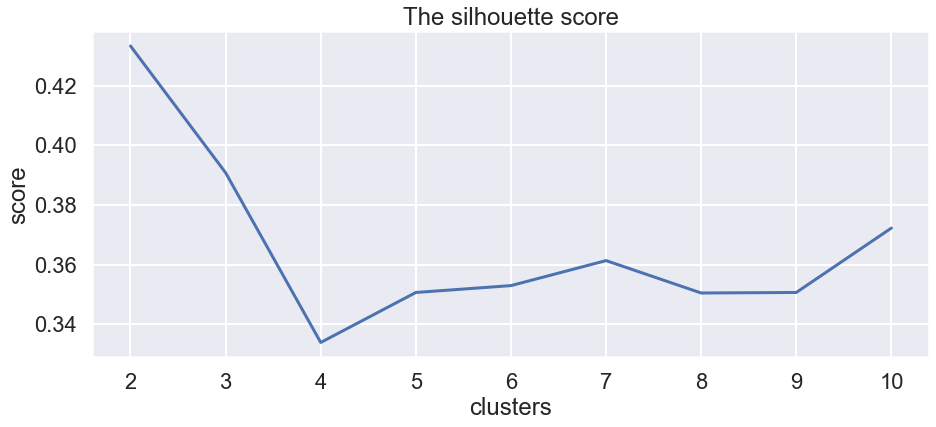

In [37]:
#add plot
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(s_score)[0], pd.DataFrame(s_score)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score') 
plt.show()

### Silhouette Score for Hierarchical Clustering

In [38]:
# Import necessary libraries
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

**Task 24: Write the code below to calculate silhouette score for each hierarchical clustering**

In [39]:
# write the code below
ward = AgglomerativeClustering(n_clusters=2)
ward_pred = ward.fit_predict(reduced_data)

In [40]:
# Hierarchical clustering using complete linkage
# Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=2, linkage="complete")

# Fit & predict
# # Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(reduced_data)

# Hierarchical clustering using average linkage
# # Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=2, linkage="average")

# Fit & predict
# # Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(reduced_data)

In [41]:
print( "Scores: \nWard:", ward_pred,"\nComplete: ", complete_pred, "\nAverage: ", avg_pred)

Scores: 
Ward: [0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0] 
Complete:  [1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 1 1 1 

**Task 25: Write the code below to make a plot for silhouette score**

In [55]:
s_score = []
ward = AgglomerativeClustering(n_clusters=2)
ward.fit_predict(reduced_data)
s_score.append([a_cluster, silhouette_score(reduced_data, ward.fit_predict(reduced_data))])

In [56]:
s_score

[[10, 0.41106689749483116]]

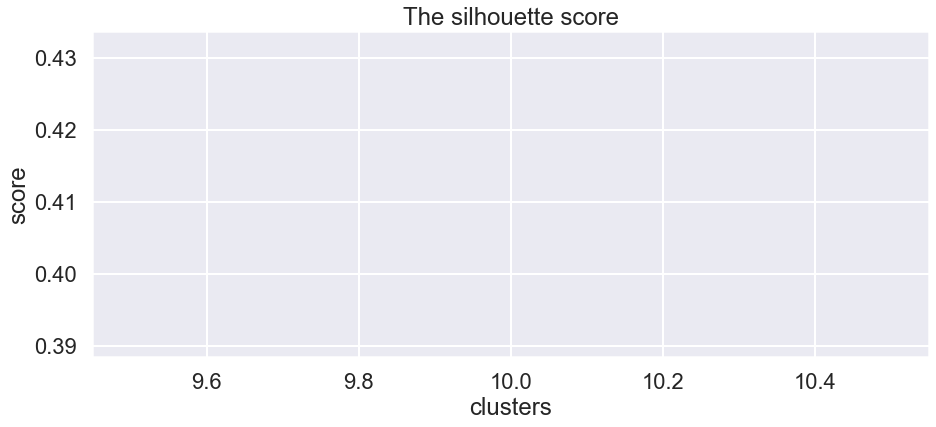

In [57]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(s_score)[0], pd.DataFrame(s_score)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score') 
plt.show()

**Question: Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?**

**Answer:**

## Implementation of K-Means

**Task 26: Implement KMeans using your choosen K**

In [59]:
# write your code here
kmean = KMeans(n_clusters=2, random_state=0)
kmean.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [60]:
# write your code here
preds = kmean.predict(reduced_data)

In [62]:
preds.shape

(431,)

## Implementation Hierarchical Clustering

**Task 27: Implement Hierarchical(agglomerative) clustering using your choosen K**

In [63]:
# write your code here
a_cluster = AgglomerativeClustering(n_clusters=2)

In [64]:
# write your code here
preds_agg = a_cluster.fit_predict(reduced_data)

In [65]:
preds_agg.shape

(431,)

## Best Clustering Algorithm?

**You will be using** `adjusted rand index` **to select the best clustering algorithm by comparing each of the calculated labels with actual labels found in** `data['Channel]` . Before calculating the score, we need to make sure that the shape of true labels is consistent with the resultant labels.

In [66]:
true_labels = data['Channel'].drop(data['Channel'].index[outliers]).reset_index(drop = True)

**Task 28: Find the adjusted rand index for K-Means and Agglomerative Clustering**

In [67]:
# Import necessary libraries
from sklearn.metrics import adjusted_rand_score

In [68]:
kmeans_score = adjusted_rand_score(true_labels, preds)
print ('The score for Kmeans is ',kmeans_score)


The score for Kmeans is  0.6160176597236163


In [69]:
aggl_score = adjusted_rand_score(true_labels, preds_agg)
print ('The score for Agglomerative Clustering is ', aggl_score)

The score for Agglomerative Clustering is  0.5638708694663402


**Question: Which has the best score and should be selected?**

**Answer:** The best number of clusters is 2. This was the best result for both the Agglomerative Clustering and KMeans algorithms

## Visualizing the clusters

**Task 29: Get the centers for KMeans**

In [70]:
# Write code here
for n_clusters in range(2,11):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

centers

array([[-3.60759287, -1.12592594],
       [ 3.42140085,  0.42968884],
       [-0.02241698, -2.41513375],
       [ 1.34241748,  1.06603024],
       [-2.59348711,  1.89532904],
       [-0.05731487,  0.21777409],
       [-1.27712102,  5.43853629],
       [ 1.71308284, -0.89209961],
       [ 2.58070468,  3.57956337],
       [-1.88547294, -0.60565997]])

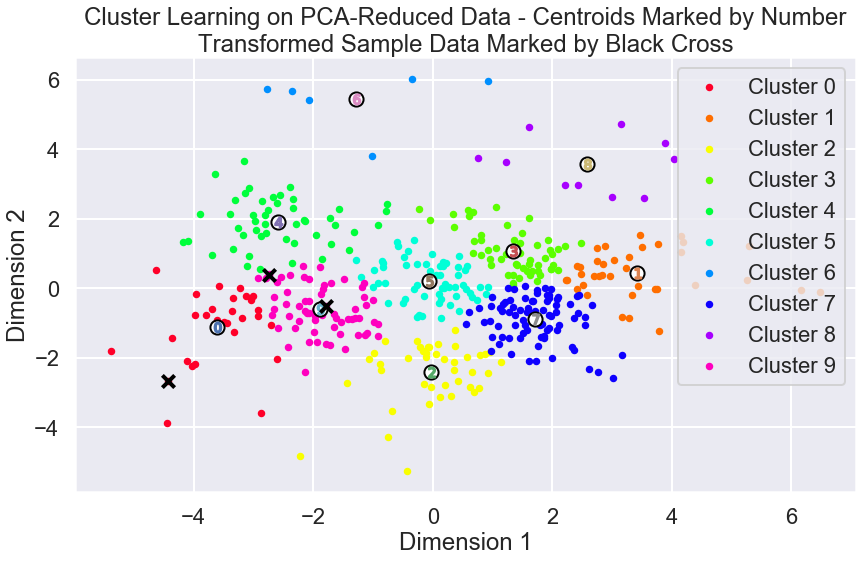

In [72]:
vs.cluster_results(reduced_data, preds, centers, pca_samples)

# Profiling

**Task 30: Get the average prices for each category from the original data frame for each cluster and then make a profile for each**

In [96]:
df_pred = df.drop(df.index[outliers]).reset_index(drop = True)
df_pred['pred'] = preds

In [115]:
p_ = df_pred[['kmean',"Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]]

In [116]:
kmean = KMeans(n_clusters=2, random_state=0)
kmean.fit(reduced_data)
df_pred['kmean'] = kmean.labels_
df_pred['kmean'].value_counts()


0    258
1    173
Name: kmean, dtype: int64

In [117]:
pivoted = p_.groupby('kmean')["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"].median().reset_index()
pivoted

,kmean,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0,10884.0,1924.0,2471.5,2296.0,322.0,818.5
1,1,5531.0,7503.0,11364.0,1057.0,4595.0,1328.0


**Task 31: Make a radar chart to show a better profile for each cluster.**

In [118]:
# Write the code to import the library files for plotly and set your credentials
import chart_studio
chart_studio.tools.set_credentials_file(username='saadnaveed', api_key='aTzWqiJ4K2m0OyxIYQF3')

In [119]:
# write the code here
import chart_studio.plotly as py
import plotly.graph_objs as go

**Task 32: Make the data set for radar chart**

In [121]:
# Write your code here
radar_data = [
    go.Scatterpolar(
      r = list(pivoted.loc[0,["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]]),
      theta = ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"],
      fill = None,
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(pivoted.loc[1,["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]]),
      theta = ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"],
      fill = None,
      fillcolor=None,
      name = 'Cluster 1'
    )

]

**Task 33: Set the layout for your radar chart and plot it**

In [128]:
# Write your code here
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 10000])), showlegend = True)

In [129]:
# add plot
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar")

**Question: What can you infer from the above plot? Explain in detail**

**Answer:** Multiple dimensions are combined and we can visualize them easily using radar plot.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

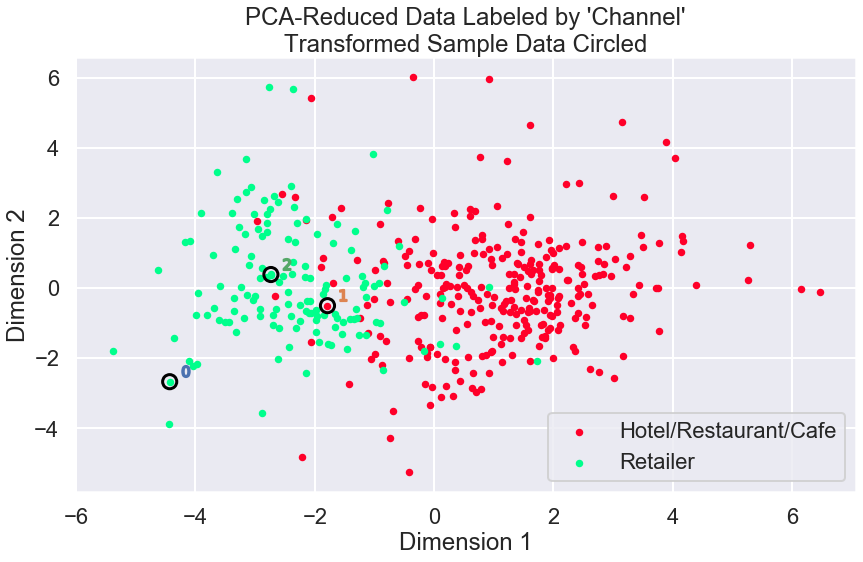

In [125]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

**Question:**
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

- The underlying distribution of "Hotel/Restaurant/Cafe" and "Retailer" clearly matches with the 2 customers segments that we created.
- The cluster algorithm doeas a pretty good job of clustering the data to the underlying distribution as the cluster 0 can be associated perfectly with a retailer and the cluster 1 to the Ho/Re/Ca.
- Yes. Though there are some classifications that could have been misclassified, overall these classifications are consistent with our definitions.